In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

dataset contain total of 
8807 - rows
12 - columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

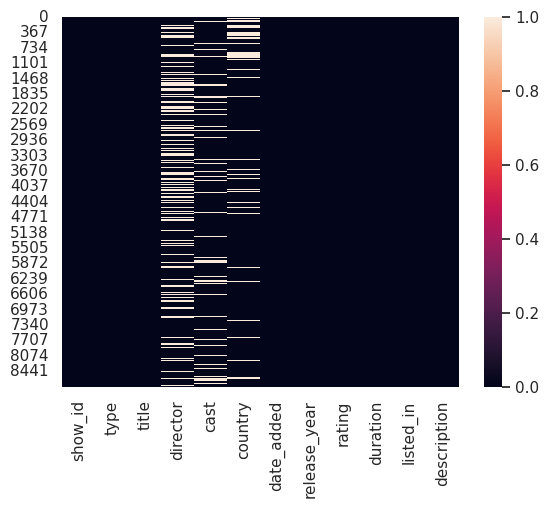

In [8]:
sns.heatmap(df.isna())

<Axes: xlabel='type', ylabel='count'>

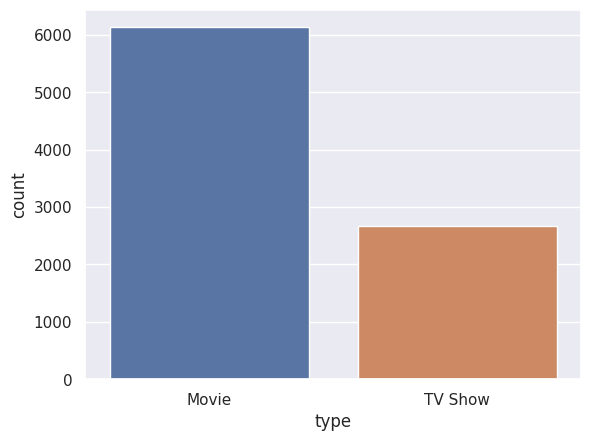

In [9]:
sns.countplot(x = 'type', data = df)

In [10]:
df.fillna('Unknown', inplace = True)

In [11]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

There are many cases where multiple countries are listed together in one entry. 

To handle this:

Split the entries with multiple countries into individual countries.
Count the frequency of each country.
Visualize the counts using a pie chart or other plots.

Text(0.5, 1.0, 'Top 20 Distribution of Movies by Country')

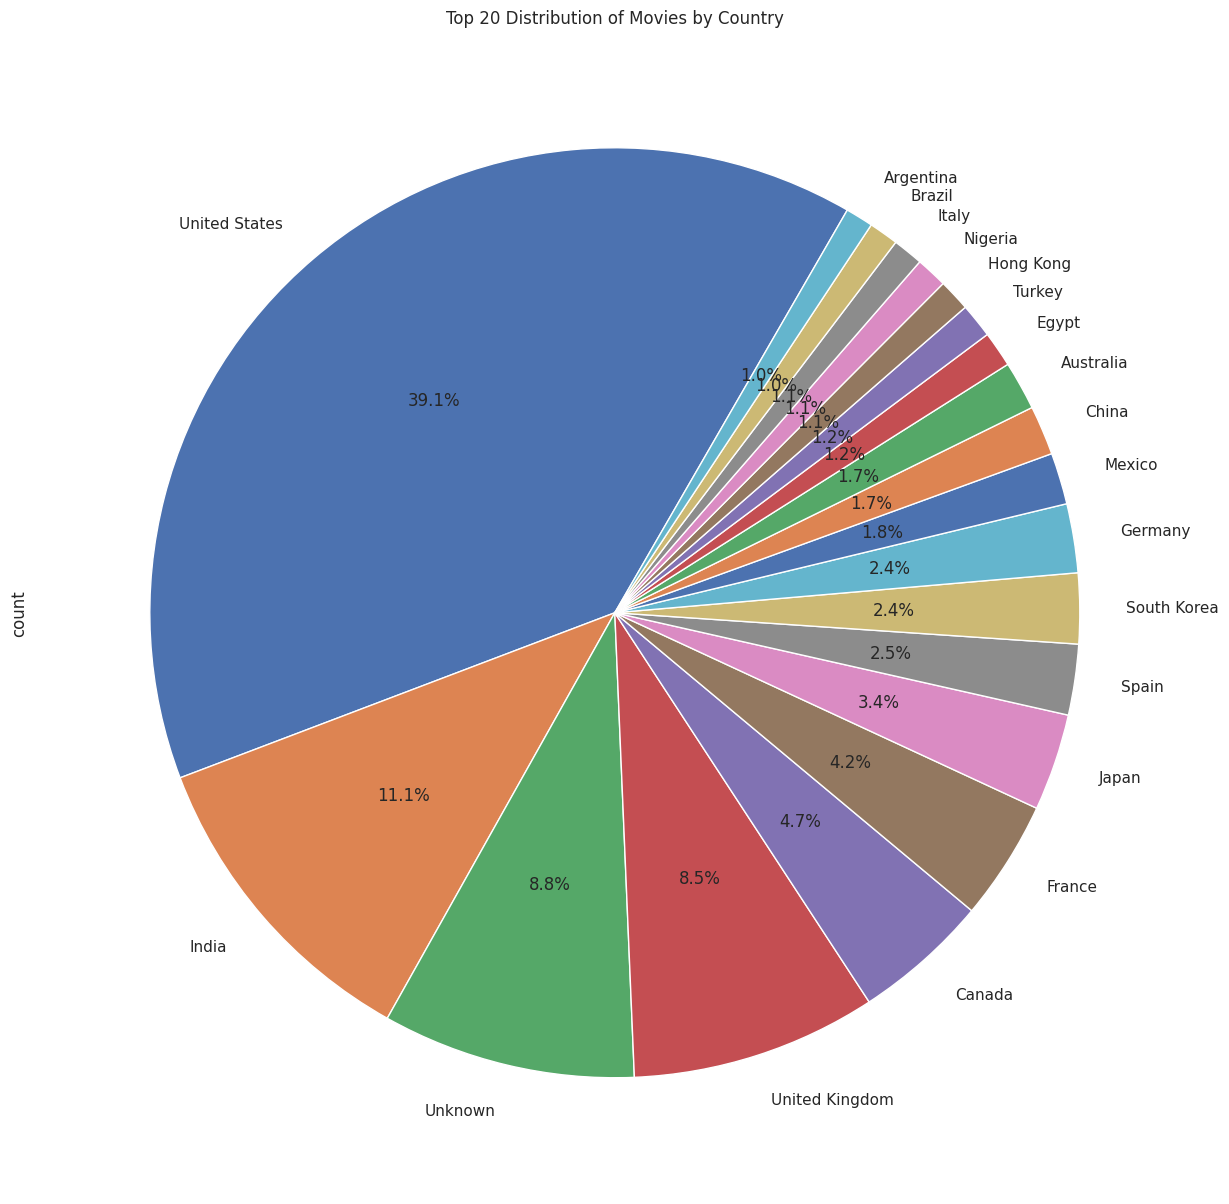

In [12]:
df_expanded = df['country'].str.split(',').explode().str.strip()

country_counts = df_expanded.value_counts()
country_counts = country_counts.head(20)
plt.figure(figsize=(15, 16))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=60)
plt.title('Top 20 Distribution of Movies by Country')

In [13]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 

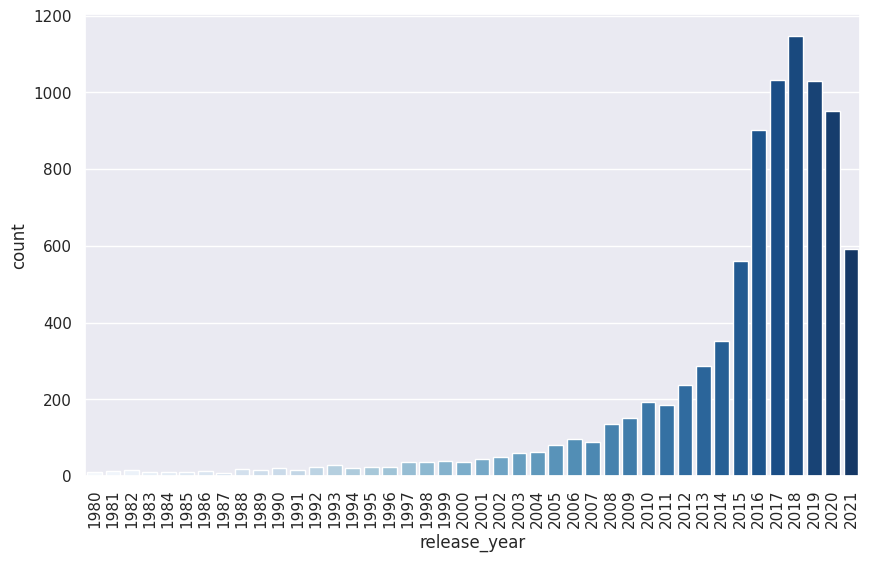

In [14]:
# Filter the DataFrame to include only rows where release_year >= 1980
filtered_df = df[df['release_year'] >= 1980]
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=filtered_df, palette='Blues')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of Ratings')

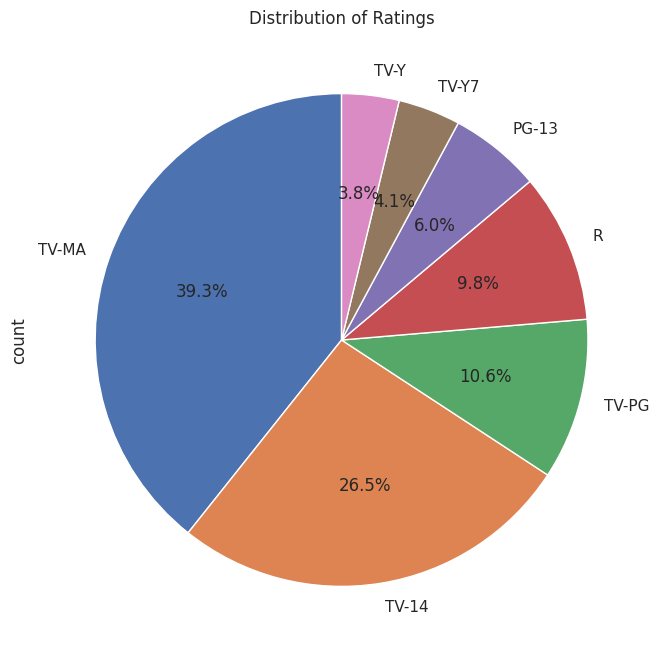

In [15]:
df['rating'].value_counts().head(7).plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribution of Ratings')

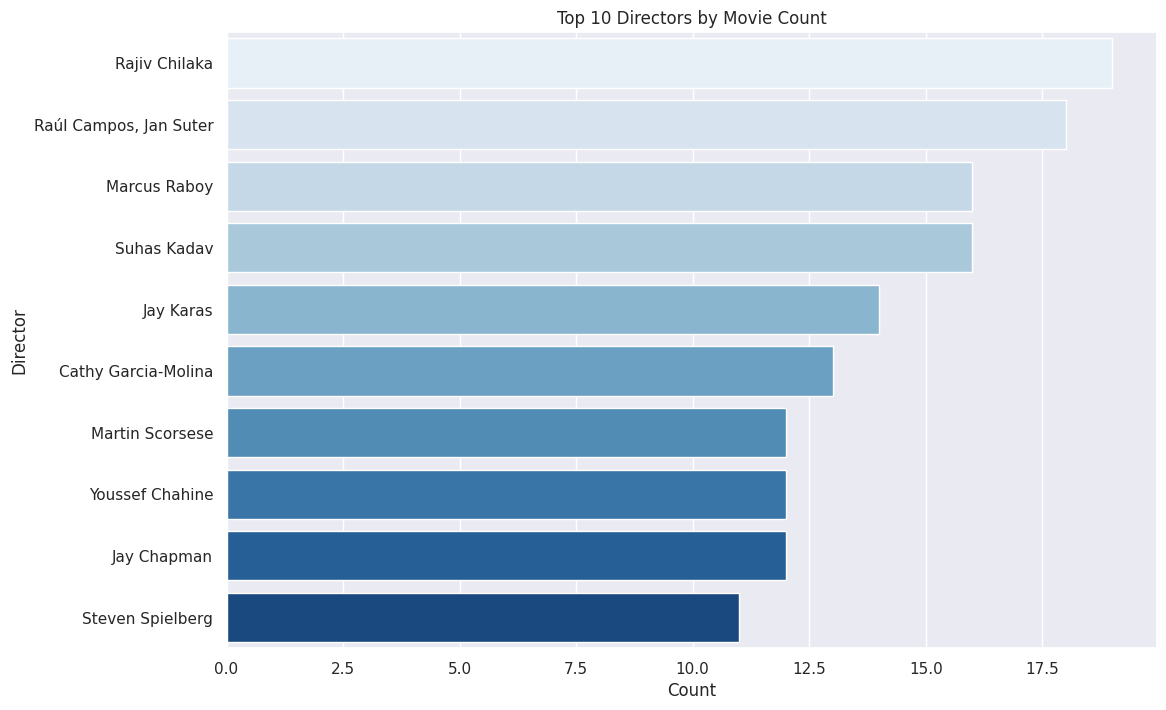

In [16]:
# Get the top 10 most frequent directors
df_cleaned = df[(df['director'] != 'Unknown')]

# Get the top 10 most frequent directors
top_directors = df_cleaned['director'].value_counts().head(10)

# Plot the distribution of top 10 directors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')

# Adding title and labels
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

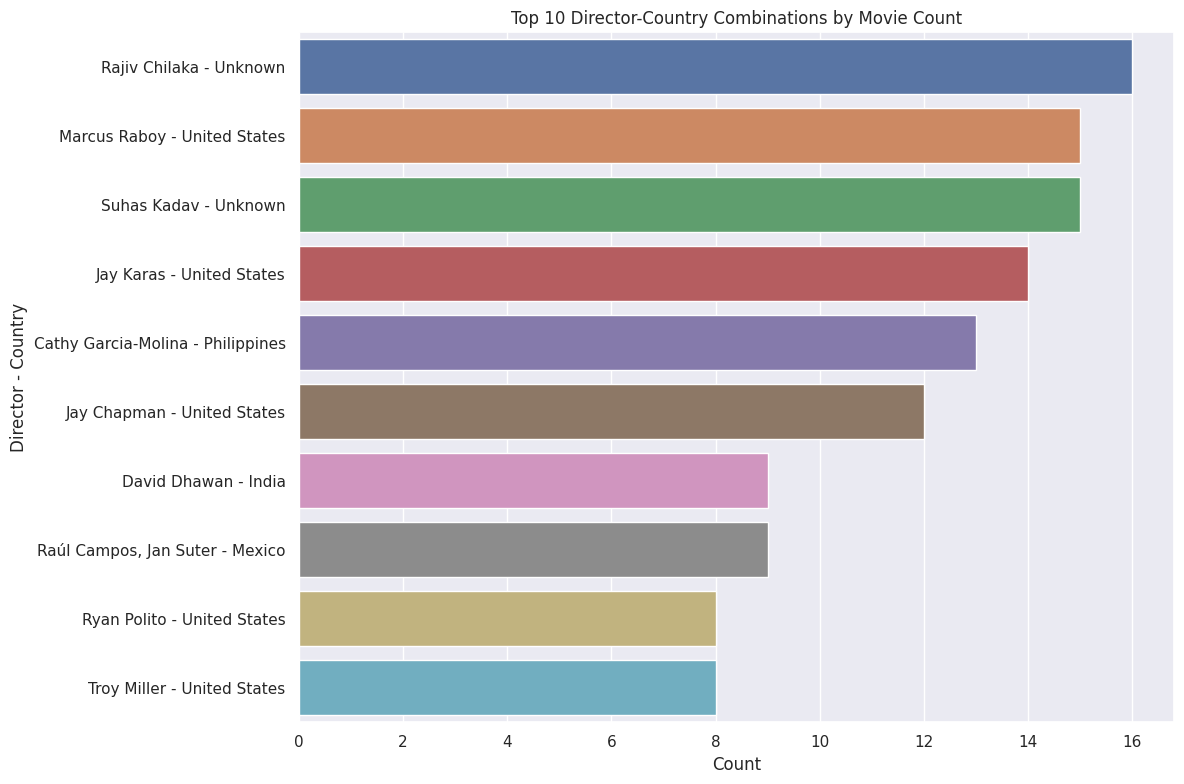

In [17]:
# Combine 'director' and 'country' into a new column for bar plot
df['director_country'] = df_cleaned['director'] + ' - ' + df_cleaned['country']

# Get the top 10 director-country combinations
top_director_country = df['director_country'].value_counts().head(10)

# Plot the top 10 director-country combinations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_director_country.values, y=top_director_country.index)

# Adding title and labels
plt.title('Top 10 Director-Country Combinations by Movie Count')
plt.xlabel('Count')
plt.ylabel('Director - Country')
plt.tight_layout()
plt.show()


In [18]:
df['listed_in'].value_counts()

df_listed_in_cleaned = df['listed_in'].str.split(',').explode().str.strip()
df_listed_in_cleaned

0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 19323, dtype: object

<Axes: ylabel='count'>

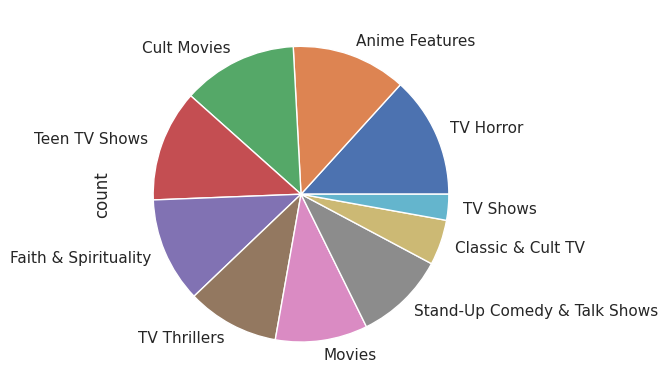

In [19]:
df_listed_in_cleaned = df_listed_in_cleaned.value_counts()
df_listed_in_cleaned = df_listed_in_cleaned.tail(10)
df_listed_in_cleaned.plot(kind='pie')